<a href="https://colab.research.google.com/github/den2morrow/colab_research/blob/main/data_secret_first_cup_2024_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/train_target.csv')
test_df = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/test.csv')
example_submit = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/submit.csv')
orders = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/orders.csv')
mobile_events = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/mobile_events.csv')
clients_promo_october = pd.read_csv('/content/drive/MyDrive/saved_datasets/Data Secrets First Cup/clients_promo_october.csv')

# EDA

## Train EDA
Думаю стоит дополнить датасет информацией из других таблиц, чтобы было больше фич, для рекомендаций

In [4]:
train_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo
0,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0
1,000D3A20F23EA95811E7B99F3ED09FC8,6,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,25,0
2,000D3A20F23EA95811E7BD373E79565E,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0
3,000D3A20F23EA95811E7BD373E79565E,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0
4,000D3A20F23EA95811E7BDAE71CD3F33,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,30,0


In [162]:
train_df['OrderType'].unique()

array(['2,3', '1,2,3'], dtype=object)

In [5]:
train_df.shape, train_df[train_df['apply_promo'] == 1].shape

((27741, 8), (827, 8))

In [57]:
test_df['LocalBeginDate'].unique(), test_df['LocalEndDate'].unique()

(array(['2023-11-02T00:00:00Z'], dtype=object),
 array(['2023-11-05T23:59:00Z'], dtype=object))

In [58]:
train_df['LocalBeginDate'].unique(), train_df['LocalEndDate'].unique()

(array(['2023-11-02T00:00:00.000Z'], dtype=object),
 array(['2023-11-05T23:59:00.000Z'], dtype=object))

Text(0.5, 1.0, 'Correlation matrix')

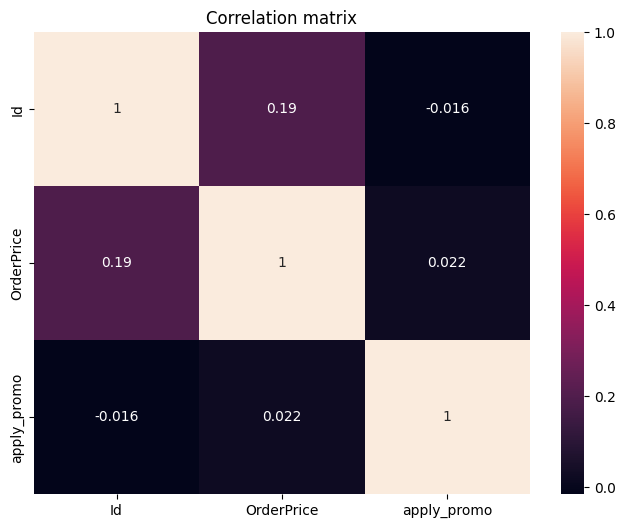

In [6]:
# Есть ли линейная корреляция с ценой заказа и промо / типом скидки и промо?
corr_matrix = train_df[['Id', 'OrderPrice', 'apply_promo']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix') # Вроде нет линейной корреляции

In [7]:
# А какое кол-во применных промокодов в зависимости от типа скидки (рубли, проценты, коины)?
[train_df[(train_df['Id'] == i) & (train_df['apply_promo'] == 1)].shape[0] for i in range(5, 8)]

[289, 239, 299]

## Test EDA
Буду проверять на данном датасете

In [8]:
test_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount
0,000D3A20F23EA95811E7C0A95563344E,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
1,000D3A20F23EA95811E7C7892A0CE261,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,699,200
2,000D3A20F23EA95811E7CD686C396528,6,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,20
3,000D3A20F23EA95911E7CEA8C574EDAE,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
4,000D3A20F23EA95911E7D4F05C59C978,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200


In [9]:
test_df.shape

(6806, 7)

## Example submit check
Просто как оформить сабмит

In [10]:
example_submit.head()

,apply_promo
0,0.307216
1,0.917305
2,0.386569
3,0.542179
4,0.536205


## Orders EDA
Таблица заказов позволяет понять, какие пользователи были, какие нет, и какие у них прошлые привычки при заказах

In [11]:
orders.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo
0,020DD76CCD949AE011EDE031ED5D76FD,NaN,NaN,000D3AAC9DCABB2E11EBE0614C89D044,2023-04-21,2023-04-21T20:51:26.000Z,000D3A2480C380DA11E692CFB9F92484,0,18,000D3A240C71BE9A11E719BE2AB264A6,4,1.0,45.0,4,2,1.0,3,0
1,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EC9AABAD354BE051CCF1EE1F83A8D0,1,485.0,485.0,4,2,1164.0,1,0
2,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EB846583CB3BDEA80D1A7F2E184D40,1,589.0,589.0,4,2,1164.0,1,0
3,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB267FD,4,45.0,45.0,4,2,1164.0,1,0
4,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB264A6,4,45.0,45.0,4,2,1164.0,1,0


In [12]:
orders.shape

(611739, 18)

In [13]:
len(orders['ClientUUId'].unique())

16337

In [14]:
orders[(orders['NewClient']  == 1) & (orders['ClientOrderNumber'] > 1)].head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo


In [15]:
orders[(orders['ClientUUId'].isin(orders[orders['NewClient'] == 0])) & (orders['NewClient'] == 1)]

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo


## Mobile Events EDA
На данный момент не могу придумать, как можно было бы использовать эту таблицу

In [16]:
mobile_events.head()

,ClientUUId,VisitToken,EventName,Platform,Timestamp
0,000D3A22FA54A81611EB315CF5443815,976627AD-76DC-41D9-981E-F2A6CA14B3A9,screen_menu,ios,2023-10-29T16:14:21.343Z
1,2A4A64AF719E994511EE3F2D8B31E188,5b22e610-c71e-4b6a-a842-71e8575ece87,screen_menu,android,2023-10-29T11:04:36.4840000Z
2,000D3AAC977BBB2F11ECDD081F5481AE,BDCEB72F-2B6A-4565-801A-6CB729279C6F,open_app,ios,2023-10-29T11:14:34.723Z
3,000D3A21DA51A81411EAE468856F96F1,A66E2DA6-4E2E-4C37-9FBF-627732623212,add_to_cart,ios,2023-10-29T14:03:08.363Z
4,000D3A23B0DC80D811E67F4D0A9CA345,1BE8139F-A3D3-439F-A51B-5CBD4D3FFF1B,screen_menu,ios,2023-10-29T08:35:40.127Z


In [17]:
mobile_events.shape

(3916654, 5)

In [18]:
len(mobile_events['VisitToken'].unique())  # То есть есть одинаковые токены посещения?

223964

## Clients promo october EDA
Таблица позволит понять, какие промокоды интересны пользователям (так как здесь уже выданные и использованные промокоды)

Возможно, LocalBeginDate ~ orders['SaleDate'] или LocalEndDate ~ orders['SaleDate']

Если это так, то можно будет собрать более интересные фичи, объединив две таблицы

In [19]:
clients_promo_october.head()  # Id - 5=рубли, 6=проценты, 7=додокоины

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount
0,000D3A20F23EA95811E7B7104AC23CD3,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,25
1,000D3A20F23EA95811E7B7D79FAABAA1,5,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,300
2,000D3A20F23EA95811E7B8BD71C73877,7,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,200
3,000D3A20F23EA95811E7B99F3ED09FC8,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,30
4,000D3A20F23EA95811E7BD373E79565E,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,20


In [20]:
clients_promo_october.shape

(477275, 7)

In [128]:
clients_promo_october[['Id', 'OrderPrice', 'Discount']].corr()

,Id,OrderPrice,Discount
Id,1.00,0.30,-0.05
OrderPrice,0.30,1.00,0.39
Discount,-0.05,0.39,1.00


(0.3216531349850715, 0.4686690063380651, 0.20967785867686345)

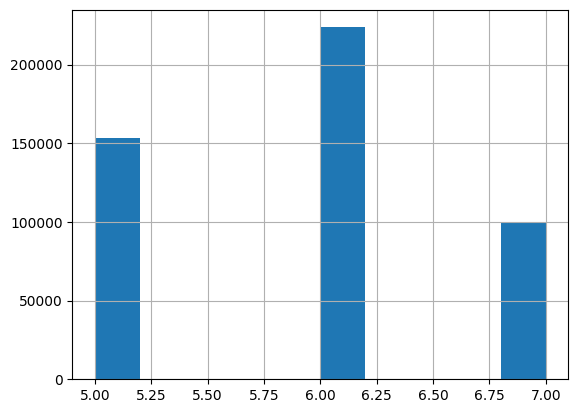

In [131]:
clients_promo_october['Id'].hist()

In [121]:
(clients_promo_october['Discount'] / clients_promo_october['OrderPrice']).describe()

count   477275.00
mean         0.12
std          0.10
min          0.01
25%          0.03
50%          0.16
75%          0.21
max          0.35
dtype: float64

<Axes: >

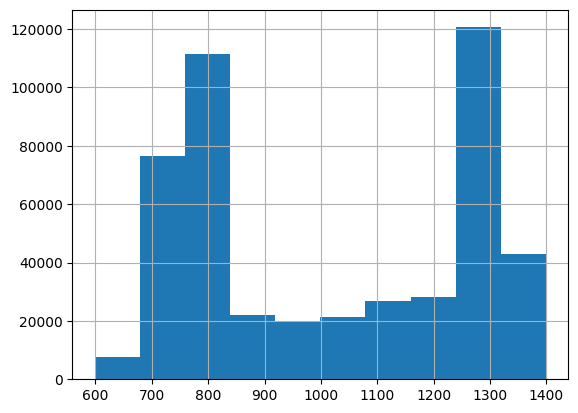

In [123]:
clients_promo_october['OrderPrice'].hist()

<Axes: >

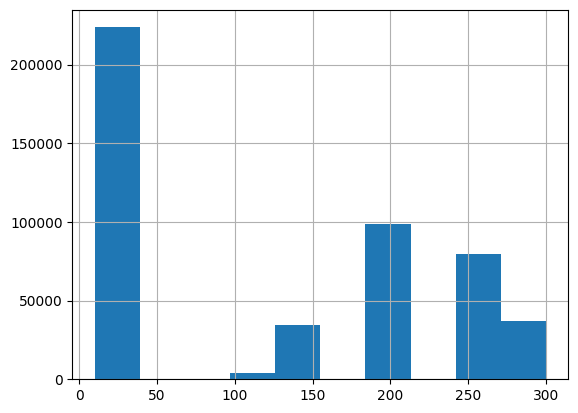

In [124]:
clients_promo_october['Discount'].hist()

<Axes: >

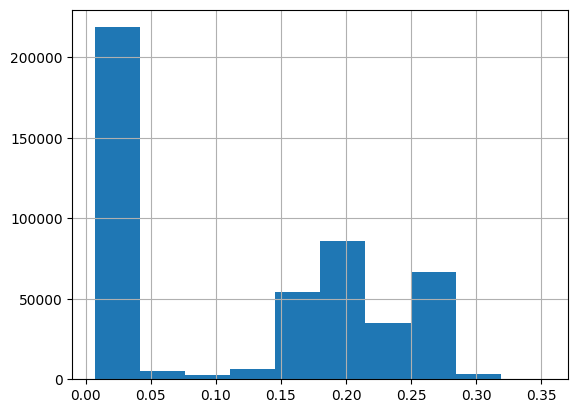

In [139]:
(clients_promo_october['Discount'] / clients_promo_october['OrderPrice']).hist()

# Создание новых признаков

## Из таблицы Orders

In [59]:
# NewClient, ClientOrderNumber, Сколько раз использовал промокоды(ClientCountPromo), процент покупок с промокодами (PercentWithPromo)
# Процент промокодов на каждый тип OrderType
# ProductTotalPrice(цена со скидкой) и MenuPrice(обычная цена), т.е. Discount=MenuPrice-ProductTotalPrice в train_df есть схожее Discount
# Нужно будет еще глянуть на OrderPrice (порог срабатывания, так как думаю это будет влиять на использование промокодов)

In [60]:
# is_new_client = orders.groupby('ClientUUId')['NewClient'].min().reset_index(name='NewClient')
# client_order_features = client_order_features.merge(is_new_client, on='ClientUUId', how='left')
# client_order_features['Discount'] = Пока оставим так, скидка точно влияет, но пока я не могу придумать, какая именно должна быть фича, для работы со скидками

In [5]:
orders['Discount'] = orders['MenuPrice'] - orders['ProductTotalPrice']

In [6]:
# Количество использованных промо
client_count_promo = orders.groupby('ClientUUId')['apply_promo'].sum().reset_index(name='client_count_promo')

# Количество заказов клиента
client_order_counts = orders.groupby('ClientUUId')['OrderUUId'].count().reset_index(name='client_order_count')

# Средняя сумма заказа клиента
client_avg_order_price = orders.groupby('ClientUUId')['OrderTotalPrice'].mean().reset_index(name='client_avg_order_price')

# События клиента
client_event_counts = mobile_events.groupby('ClientUUId')['EventName'].count().reset_index(name='client_event_count')

In [7]:
client_order_features = client_count_promo.merge(client_order_counts, on='ClientUUId', how='left')
client_order_features = client_order_features.merge(client_avg_order_price, on='ClientUUId', how='left')
client_order_features = client_order_features.merge(client_event_counts, on='ClientUUId', how='left')

client_order_features['percent_order_with_promo'] = client_order_features['client_count_promo'] / client_order_features['client_order_count']


In [64]:
client_order_features.head()

,ClientUUId,client_count_promo,client_order_count,client_avg_order_price,client_event_count,percent_order_with_promo
0,000D3A20F23EA95811E7B7104AC23CD3,62,74,1139.810811,127.0,0.837838
1,000D3A20F23EA95811E7B88F5E50100B,6,52,1150.288462,210.0,0.115385
2,000D3A20F23EA95811E7B8BD71C73877,5,35,945.600000,124.0,0.142857
3,000D3A20F23EA95811E7B95FE7E6321C,5,48,904.229167,52.0,0.104167
4,000D3A20F23EA95811E7B969B5BD2C3F,0,34,1170.529412,120.0,0.000000


In [65]:
client_order_features.isnull().sum()

ClientUUId                   0
client_count_promo           0
client_order_count           0
client_avg_order_price       0
client_event_count          86
percent_order_with_promo     0
dtype: int64

In [8]:
client_order_features['client_event_count'] = client_order_features['client_event_count'].fillna(0)

In [22]:
client_order_features.columns

Index(['ClientUUId', 'client_count_promo', 'client_order_count',
       'client_avg_order_price', 'client_event_count',
       'percent_order_with_promo'],
      dtype='object')

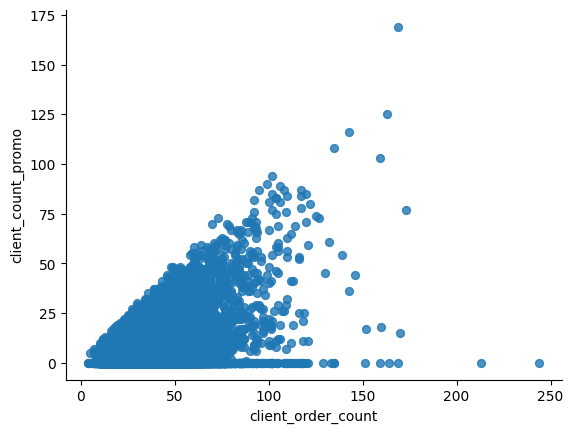

In [67]:
# @title client_count_promo vs client_order_count

from matplotlib import pyplot as plt
client_order_features.plot(kind='scatter', x='client_order_count', y='client_count_promo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Из таблицы Clients Promo October

Для создания новых фич могут быть интересны Discount (размер скидки), OrderPrice (порог срабатывания), Id (рубли/проценты/додокоины), OrderType (тип заказа)

In [9]:
# Делаю копию, чтобы на ней и создавать новые фичи этой таблицы
promo_features = clients_promo_october.copy()

In [10]:
# Отношение скидки к порогу срабатывания
promo_features['discount_to_orderprice_ratio'] = promo_features['Discount'] / promo_features['OrderPrice']

# Средний размер скидки для клиента
avg_discount_per_client = promo_features.groupby('ClientUUId')['Discount'].mean().reset_index(name='avg_discount_per_client')
avg_discount_per_client.columns = ['ClientUUId', 'avg_discount_per_client']
promo_features = promo_features.merge(avg_discount_per_client, on='ClientUUId', how='left')

# Общее количество промо-акций для клиента
total_promos_per_client = promo_features.groupby('ClientUUId')['Id'].count().reset_index(name='total_promos')
total_promos_per_client.columns = ['ClientUUId', 'total_promos']
promo_features = promo_features.merge(total_promos_per_client, on='ClientUUId', how='left')

# Скидка по типу заказа
discount_by_order_type = promo_features.groupby('OrderType')['Discount'].mean().reset_index(name='mean_discount_by_type')
discount_by_order_type.columns = ['OrderType', 'mean_discount_by_type']
promo_features = promo_features.merge(discount_by_order_type, on='OrderType', how='left')

# Порог срабатывания по типу заказа
orderprice_by_order_type = promo_features.groupby('OrderType')['OrderPrice'].mean().reset_index(name='mean_orderprice_by_type')
orderprice_by_order_type.columns = ['OrderType', 'mean_orderprice_by_type']
promo_features = promo_features.merge(orderprice_by_order_type, on='OrderType', how='left')


# Ids = [clients_promo_october[clients_promo_october['Id'] == i]['Id'].count() for i in range(5, 8)]
# id_5_percent, id_6_percent, id_7_percent = Ids[0]/sum(Ids), Ids[1]/sum(Ids), Ids[2]/sum(Ids)
# id_5_percent, id_6_percent, id_7_percent

In [18]:
# # Словарь для замены значений
# replace_dict = {
#     5: id_5_percent,
#     6: id_6_percent,
#     7: id_7_percent
# }

# # Замена значений в колонке 'Id'
# new_clients_promo_october['percent_of_id'] = new_clients_promo_october['Id'].map(replace_dict)
# new_clients_promo_october.head()
promo_features.head()

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount,discount_to_orderprice_ratio,avg_discount_per_client,total_promos,mean_discount_by_type,mean_orderprice_by_type
0,000D3A20F23EA95811E7B7104AC23CD3,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,25,0.019246,107.857143,14,154.679743,1220.005775
1,000D3A20F23EA95811E7B7D79FAABAA1,5,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,300,0.230947,227.222222,18,154.679743,1220.005775
2,000D3A20F23EA95811E7B8BD71C73877,7,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,200,0.160128,145.000000,16,154.679743,1220.005775
3,000D3A20F23EA95811E7B99F3ED09FC8,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,30,0.024019,80.357143,14,154.679743,1220.005775
4,000D3A20F23EA95811E7BD373E79565E,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,20,0.015396,94.583333,12,154.679743,1220.005775


In [11]:
promo_features = promo_features[['ClientUUId', 'discount_to_orderprice_ratio', 'avg_discount_per_client',
                                 'total_promos', 'mean_discount_by_type', 'mean_orderprice_by_type']]

In [29]:
promo_features.head()

,ClientUUId,discount_to_orderprice_ratio,avg_discount_per_client,total_promos,mean_discount_by_type,mean_orderprice_by_type
0,000D3A20F23EA95811E7B7104AC23CD3,0.019246,107.857143,14,154.679743,1220.005775
1,000D3A20F23EA95811E7B7D79FAABAA1,0.230947,227.222222,18,154.679743,1220.005775
2,000D3A20F23EA95811E7B8BD71C73877,0.160128,145.000000,16,154.679743,1220.005775
3,000D3A20F23EA95811E7B99F3ED09FC8,0.024019,80.357143,14,154.679743,1220.005775
4,000D3A20F23EA95811E7BD373E79565E,0.015396,94.583333,12,154.679743,1220.005775


Когда буду делать модель с нейронной сетью, нужно будет нормализовывать фичи, перед передачей в модель

# Merge data

In [12]:
# Присоединение новых признаков к основному DataFrame
new_train_df = train_df.merge(client_order_features, on='ClientUUId', how='left')
new_train_df = new_train_df.merge(promo_features, on='ClientUUId', how='left')

In [13]:
new_train_df.isnull().sum(), new_train_df.shape[0]

(ClientUUId                           0
 Id                                   0
 OrderType                            0
 LocalBeginDate                       0
 LocalEndDate                         0
 OrderPrice                           0
 Discount                             0
 apply_promo                          0
 client_count_promo              197072
 client_order_count              197072
 client_avg_order_price          197072
 client_event_count              197072
 percent_order_with_promo        197072
 discount_to_orderprice_ratio         0
 avg_discount_per_client              0
 total_promos                         0
 mean_discount_by_type                0
 mean_orderprice_by_type              0
 dtype: int64,
 441139)

In [14]:
new_train_df['client_count_promo'] = new_train_df['client_count_promo'].fillna(0)
new_train_df['client_order_count'] = new_train_df['client_order_count'].fillna(0)
new_train_df['client_avg_order_price'] = new_train_df['client_avg_order_price'].fillna(0)
new_train_df['client_event_count'] = new_train_df['client_event_count'].fillna(0)
new_train_df['percent_order_with_promo'] = new_train_df['percent_order_with_promo'].fillna(0)

In [15]:
new_train_df.isnull().sum(), new_train_df.shape[0]

(ClientUUId                      0
 Id                              0
 OrderType                       0
 LocalBeginDate                  0
 LocalEndDate                    0
 OrderPrice                      0
 Discount                        0
 apply_promo                     0
 client_count_promo              0
 client_order_count              0
 client_avg_order_price          0
 client_event_count              0
 percent_order_with_promo        0
 discount_to_orderprice_ratio    0
 avg_discount_per_client         0
 total_promos                    0
 mean_discount_by_type           0
 mean_orderprice_by_type         0
 dtype: int64,
 441139)

In [15]:
new_train_df.head()

,ClientUUId,Id_x,OrderType_x,LocalBeginDate_x,LocalEndDate_x,OrderPrice_x,Discount_x,apply_promo,client_count_promo,client_order_count,...,LocalBeginDate_y,LocalEndDate_y,OrderType_y,OrderPrice_y,Discount_y,discount_to_orderprice_ratio,avg_discount,total_promos,mean_discount_by_type,mean_orderprice_by_type
0,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,...,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,30,0.024019,80.357143,14,154.679743,1220.005775
1,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,...,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"2,3",749,150,0.200267,80.357143,14,100.731677,816.430568
2,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,...,2023-10-09T00:00:00.000Z,2023-10-11T23:59:00.000Z,"1,2,3",1299,20,0.015396,80.357143,14,154.679743,1220.005775
3,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,...,2023-10-05T00:00:00.000Z,2023-10-08T23:59:00.000Z,"1,2,3",1249,30,0.024019,80.357143,14,154.679743,1220.005775
4,000D3A20F23EA95811E7B99F3ED09FC8,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,...,2023-10-26T00:00:00.000Z,2023-10-29T23:59:00.000Z,"1,2,3",1249,30,0.024019,80.357143,14,154.679743,1220.005775


In [34]:
new_train_df['OrderType'].unique(), new_train_df['Id'].unique()

(array(['2,3', '1,2,3'], dtype=object), array([7, 6, 5]))

In [73]:
new_train_df[new_train_df['Id'] == 5]

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,client_count_promo,client_order_count,client_avg_order_price,client_event_count,percent_order_with_promo
2,000D3A20F23EA95811E7BD373E79565E,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,0.0,0.0,0.000000,0.0,0.000000
3,000D3A20F23EA95811E7BD373E79565E,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.000000
5,000D3A20F23EA95811E7BDAE71CD3F33,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.000000
11,000D3A20F23EA95811E7C4352EC19E2B,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,0.0,0.0,0.000000,0.0,0.000000
18,000D3A20F23EA95911E7D1D7133A0F5A,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27731,7E595BF1EB05B56E11EDB9C6FE6B0F7B,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,200,0,0.0,0.0,0.000000,0.0,0.000000
27736,82EDBCD6CE60978F11EDC591DCA75401,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0,10.0,42.0,1443.595238,159.0,0.238095
27737,82EDBCD6CE60978F11EDC591DCA75401,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0,10.0,42.0,1443.595238,159.0,0.238095
27739,8606F5E4CA39BF7211EE517E6E1D90B7,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,749,200,0,0.0,0.0,0.000000,0.0,0.000000


In [16]:
# Обработка категориальных признаков
new_train_df = pd.get_dummies(new_train_df, columns=['Id'], prefix='Id')

In [36]:
new_train_df.head()

,ClientUUId,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,client_count_promo,client_order_count,client_avg_order_price,client_event_count,percent_order_with_promo,discount_to_orderprice_ratio,avg_discount_per_client,total_promos,mean_discount_by_type,mean_orderprice_by_type,Id_5,Id_6,Id_7
0,000D3A20F23EA95811E7B99F3ED09FC8,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,1853.727273,187.0,0.0,0.024019,80.357143,14,154.679743,1220.005775,False,False,True
1,000D3A20F23EA95811E7B99F3ED09FC8,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,1853.727273,187.0,0.0,0.200267,80.357143,14,100.731677,816.430568,False,False,True
2,000D3A20F23EA95811E7B99F3ED09FC8,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,1853.727273,187.0,0.0,0.015396,80.357143,14,154.679743,1220.005775,False,False,True
3,000D3A20F23EA95811E7B99F3ED09FC8,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,1853.727273,187.0,0.0,0.024019,80.357143,14,154.679743,1220.005775,False,False,True
4,000D3A20F23EA95811E7B99F3ED09FC8,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0,0.0,33.0,1853.727273,187.0,0.0,0.024019,80.357143,14,154.679743,1220.005775,False,False,True


In [76]:
new_train_df['LocalEndDate'].unique(), new_train_df['LocalBeginDate'].unique()

(array(['2023-11-05T23:59:00.000Z'], dtype=object),
 array(['2023-11-02T00:00:00.000Z'], dtype=object))

In [77]:
new_train_df['LocalEndDate'] = pd.to_datetime(new_train_df['LocalEndDate'], format="%Y-%m-%dT%H:%M:%S.%fZ")
new_train_df['LocalBeginDate'] = pd.to_datetime(new_train_df['LocalBeginDate'], format="%Y-%m-%dT%H:%M:%S.%fZ")

(new_train_df['LocalEndDate'] - new_train_df['LocalBeginDate']).unique()

<TimedeltaArray>
['3 days 23:59:00']
Length: 1, dtype: timedelta64[ns]

In [18]:
# Подготовка данных для модели
X = new_train_df.drop(columns=['apply_promo', 'LocalBeginDate', 'LocalEndDate', 'OrderType', 'ClientUUId'])  # OrderType пока убираю, так как не знаю, как кодировать его пока, а ClientUUId потому что это id, который и так есть в таблице
y = new_train_df['apply_promo']

In [19]:
X.columns

Index(['OrderPrice', 'Discount', 'client_count_promo', 'client_order_count',
       'client_avg_order_price', 'client_event_count',
       'percent_order_with_promo', 'discount_to_orderprice_ratio',
       'avg_discount_per_client', 'total_promos', 'mean_discount_by_type',
       'mean_orderprice_by_type', 'Id_5', 'Id_6', 'Id_7'],
      dtype='object')

In [20]:
# Разделение данных на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Preprocess pipeline

In [21]:
orders['Discount'] = orders['MenuPrice'] - orders['ProductTotalPrice']

In [82]:
# Количество использованных промо
client_count_promo = orders.groupby('ClientUUId')['apply_promo'].sum().reset_index(name='client_count_promo')

# Количество заказов клиента
client_order_counts = orders.groupby('ClientUUId')['OrderUUId'].count().reset_index(name='client_order_count')

# Средняя сумма заказа клиента
client_avg_order_price = orders.groupby('ClientUUId')['OrderTotalPrice'].mean().reset_index(name='client_avg_order_price')

# События клиента
client_event_counts = mobile_events.groupby('ClientUUId')['EventName'].count().reset_index(name='client_event_count')

In [83]:
# Объединение с новыми признаками
client_order_features = client_count_promo.merge(client_order_counts, on='ClientUUId', how='left')
client_order_features = client_order_features.merge(client_avg_order_price, on='ClientUUId', how='left')
client_order_features = client_order_features.merge(client_event_counts, on='ClientUUId', how='left')

client_order_features['percent_order_with_promo'] = client_order_features['client_count_promo'] / client_order_features['client_order_count']

# Заполнение пустых значений
client_order_features['client_event_count'] = client_order_features['client_event_count'].fillna(0)

In [84]:
# Присоединение новых признаков к основному test DataFrame
new_test_df = test_df.merge(client_order_features, on='ClientUUId', how='left')

# Заполнение пустых значений
new_test_df['client_count_promo'] = new_test_df['client_count_promo'].fillna(0)
new_test_df['client_order_count'] = new_test_df['client_order_count'].fillna(0)
new_test_df['client_avg_order_price'] = new_test_df['client_avg_order_price'].fillna(0)
new_test_df['client_event_count'] = new_test_df['client_event_count'].fillna(0)
new_test_df['percent_order_with_promo'] = new_test_df['percent_order_with_promo'].fillna(0)

# Обработка категориальных признаков
new_test_df = pd.get_dummies(new_test_df, columns=['Id'], prefix='Id')

# Удаление столбцов
X_test = new_test_df.drop(columns=['OrderType', 'ClientUUId', 'LocalBeginDate', 'LocalEndDate'])  # OrderType пока убираю, так как не знаю, как кодировать его пока, а ClientUUId потому что это id, который и так есть в таблице


# ROC AUC CURVE

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def create_roc_auc_curve(model, X, y):
  # Предсказание вероятностей для положительного класса
  y_prob = model.predict_proba(X_train)[:, 1]

  # Расчет ROC AUC
  roc_auc = roc_auc_score(y_train, y_prob)
  print('ROC AUC:', roc_auc)

  # Построение ROC кривой
  fpr, tpr, thresholds = roc_curve(y_train, y_prob)

  plt.figure()
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()

# Create csv file

In [23]:
def create_predictions(model, X_test, save_name: str = 'predictions'):
  # Предсказание вероятностей для положительного класса
  y_prob = model.predict_proba(X_test)[:, 1]

  # Создание DataFrame с предсказаниями
  predictions = pd.DataFrame({'apply_promo': y_prob})

  # Сохранение предсказаний в CSV файл
  predictions.to_csv(f'{save_name}.csv', index_label='index')

  # Вывод первых строк результата для проверки
  print(predictions.head())

# Lazy predict

In [24]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)
models

 10%|█         | 3/29 [00:47<05:16, 12.17s/it]

# Random Forest Classificator with GridSearch

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Определение параметров для Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Создание модели RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Настройка Grid Search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# # Обучение Grid Search
# grid_search.fit(X_train, y_train)

# # Получение лучших параметров
# best_params = grid_search.best_params_
# print('Best Parameters:', best_params)
# # {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# # Обучение модели с лучшими параметрами
# best_model = grid_search.best_estimator_

In [ ]:
# create_roc_auc_curve(best_model, X_train, y_train)
# create_roc_auc_curve(best_model, X_val, y_val)

In [ ]:
# get_predictions(best_model, X_test, save_name='predictions_rf_grid_search')

# GaussianNB with GridSearchCV

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Создание модели GaussianNB
gaussian = GaussianNB()

# Создание 100 значений var_smoothing в логарифмической шкале
# Используем логарифмическое распределение от 1e-10 до 1e-2
log_min = np.log10(1e-10)
log_max = np.log10(1e-2)
log_values = np.linspace(log_min, log_max, 100)
var_smoothing_values = 10 ** log_values

# Параметры для GridSearchCV
param_grid = {
    'var_smoothing': var_smoothing_values # пример значений для подбора
}

# Настройка GridSearchCV
gs_gaussian = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Обучение GridSearchCV
gs_gaussian.fit(X_train, y_train)

# Печать лучших параметров
print("Best parameters found: ", gs_gaussian.best_params_)

# Лучшая модель
best_model_gauss = gs_gaussian.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'var_smoothing': 9.999999999999999e-11}


ROC AUC: 0.6932894119591558


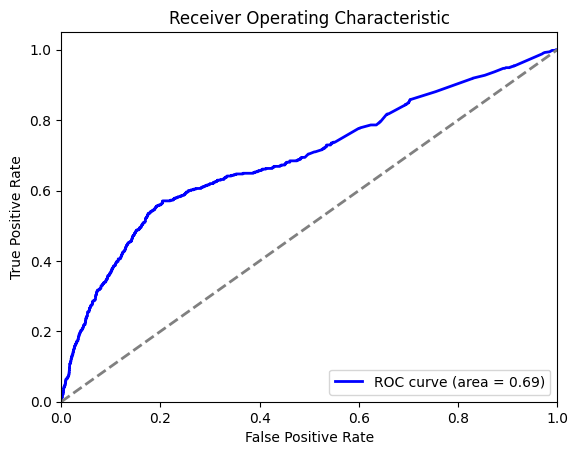

ROC AUC: 0.6932894119591558


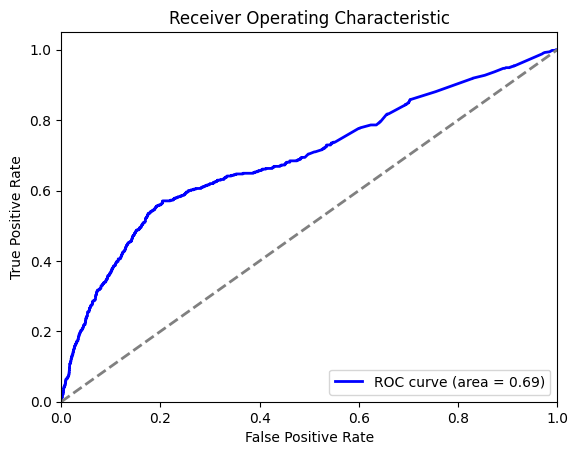

In [107]:
create_roc_auc_curve(best_model_gauss, X_train, y_train)
create_roc_auc_curve(best_model_gauss, X_val, y_val)

In [108]:
create_predictions(best_model_gauss, X_test, save_name='predictions_gauss_with_grid_search')

   apply_promo
0         0.01
1         0.93
2         0.00
3         0.00
4         0.05


# Nearest Centroid

In [99]:
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.extmath import softmax
from sklearn.metrics.pairwise import pairwise_distances


class MyNearestCentroid(NearestCentroid):
  def predict_proba(self, X):
    distances = pairwise_distances(X, self.centroids_, metric=self.metric)
    probs = softmax(distances)
    return probs


# Создание модели NearestCentroid
nearest_centroid = MyNearestCentroid()

# Обучение модели
nearest_centroid.fit(X_train, y_train)

# Получение расстояний до ближайших центроидов
nearest_centroid.predict_proba(X_val)

# Преобразование расстояний в псевдовероятности
# scaler = MinMaxScaler()
# probabilities = scaler.fit_transform(distances.reshape(-1, 1))

array([[1.00000000e+00, 2.88898731e-56],
       [1.00000000e+00, 4.12574132e-21],
       [3.92742474e-67, 1.00000000e+00],
       ...,
       [5.53765537e-55, 1.00000000e+00],
       [1.32657318e-54, 1.00000000e+00],
       [1.00000000e+00, 1.20022231e-34]])

ROC AUC: 0.4092312665738168


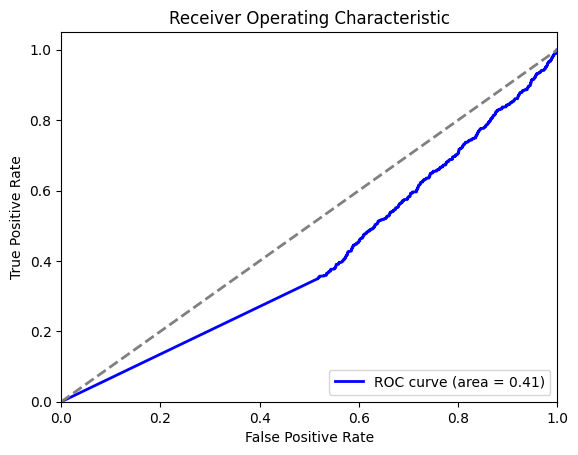

ROC AUC: 0.4092312665738168


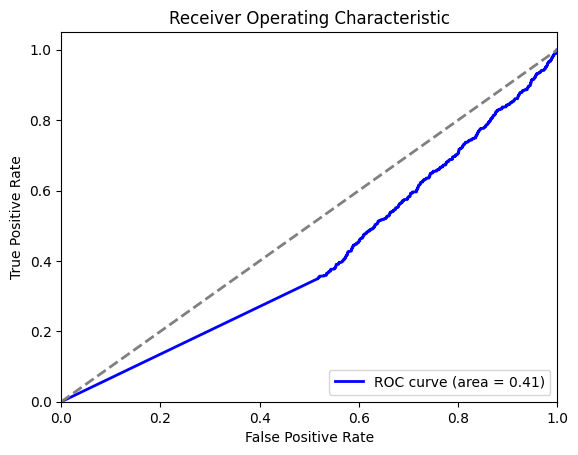

In [96]:
create_roc_auc_curve(nearest_centroid, X_train, y_train)
create_roc_auc_curve(nearest_centroid, X_val, y_val)

In [97]:
create_predictions(nearest_centroid, X_test, save_name='predictions_my_nearest_centroid')

   apply_promo
0         1.00
1         0.00
2         1.00
3         1.00
4         0.00


# Logistic Regression

In [ ]:
# Обучение модели (например, логистическая регрессия)
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

# Random Forest Classificator

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
create_roc_auc_curve(rf, X_train, y_train)
create_roc_auc_curve(rf, X_val, y_val)

In [ ]:
create_predictions(rf, X_test, save_name='predictions_rf')

# XGBoost with Optuna


In [ ]:
!pip install optuna xgboost

In [ ]:
# import optuna
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score


# def objective(trial):
#     param = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'auc',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'max_depth': trial.suggest_int('max_depth', 3, 5),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
#         'subsample': trial.suggest_float('subsample', 0.8, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0)
#     }

#     model = xgb.XGBClassifier(**param)
#     model.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=10, verbose=False)

#     y_prob = model.predict_proba(X_val)[:, 1]
#     return roc_auc_score(y_val, y_prob)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# best_params = study.best_params
# print('Best Parameters for XGBClassifier:', best_params)

# # Обучение модели с лучшими параметрами
# best_xgb_model = xgb.XGBClassifier(**best_params)
# best_xgb_model.fit(X_train, y_train)

In [ ]:
create_roc_auc_curve(best_xgb_model, X_train, y_train)
create_roc_auc_curve(best_xgb_model, X_val, y_val)
get_predictions(best_xgb_model, X_test, save_name='predictions_xgb_optuna')